In [1]:
# SKLearn Implemention
from sklearn.metrics import log_loss
log_loss(["REAL", "FAKE", "FAKE", "REAL"],
         [[.1, .9], [.9, .1], [.8, .2], [.35, .65]])

0.21616187468057912

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import cv2 as cv
import os
from IPython.display import Video
from IPython.display import HTML
from PIL import Image, ImageDraw
import face_recognition
plt.style.use('ggplot')

In [3]:
DATA_FOLDER = '/a/bear.cs.fiu.edu./disk/bear-b/users/hluo003/Downloads/data'
TRAIN_SAMPLE_FOLDER = 'train_sample_videos/'
TEST_FOLDER = 'test_videos'
train_sample_metadata = pd.read_json('/a/bear.cs.fiu.edu./disk/bear-b/users/hluo003/Downloads/data/train_sample_videos/metadata.json').T
train_sample_metadata.head()

label  split        original
aagfhgtpmv.mp4  FAKE  train  vudstovrck.mp4
aapnvogymq.mp4  FAKE  train  jdubbvfswz.mp4
abarnvbtwb.mp4  REAL  train            None
abofeumbvv.mp4  FAKE  train  atvmxvwyns.mp4
abqwwspghj.mp4  FAKE  train  qzimuostzz.mp4

In [4]:
train_list = list(os.listdir(os.path.join(DATA_FOLDER, TRAIN_SAMPLE_FOLDER)))
test_list = list(os.listdir(os.path.join(DATA_FOLDER, TEST_FOLDER)))
json_file = [file for file in train_list if  file.endswith('json')][0]
print(f"JSON file: {json_file}")

JSON file: metadata.json


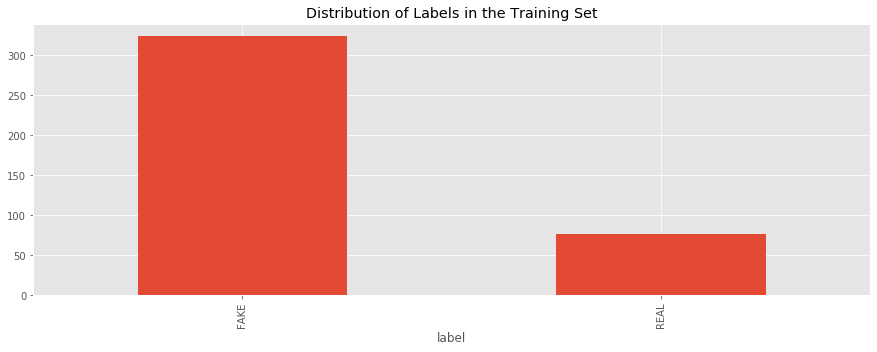

In [5]:
train_sample_metadata.groupby('label')['label'].count().plot(figsize=(15, 5), kind='bar', title='Distribution of Labels in the Training Set')
plt.show()

### use the face_recognition package to detect faces in the video

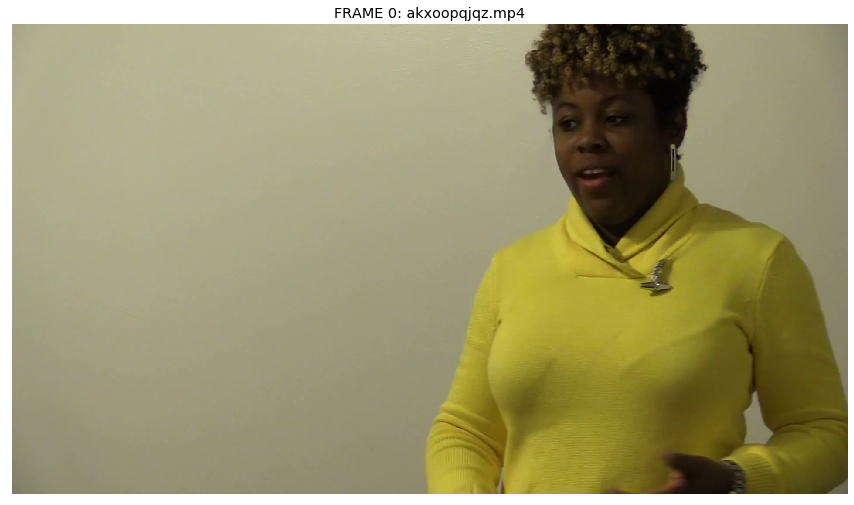

In [6]:
train_dir = os.path.join(DATA_FOLDER, TRAIN_SAMPLE_FOLDER)
fig, ax = plt.subplots(1,1, figsize=(15, 15))
train_video_files = [train_dir + x for x in os.listdir(train_dir)]
video_file = train_video_files[30]
video_file = train_dir + 'akxoopqjqz.mp4'
cap = cv.VideoCapture(video_file)
success, image = cap.read()
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cap.release()   
ax.imshow(image)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.title.set_text(f"FRAME 0: {video_file.split('/')[-1]}")
plt.grid(False)

### Locating a face within an image

The chin in this face has the following points: [(1247, 239), (1245, 268), (1247, 297), (1255, 328), (1268, 358), (1285, 387), (1304, 416), (1323, 438), (1350, 445), (1383, 439), (1419, 423), (1453, 399), (1482, 370), (1501, 335), (1507, 295), (1505, 256), (1501, 219)]
The left_eyebrow in this face has the following points: [(1251, 198), (1257, 185), (1272, 181), (1288, 183), (1304, 190)]
The right_eyebrow in this face has the following points: [(1342, 184), (1362, 171), (1386, 165), (1411, 170), (1432, 181)]
The nose_bridge in this face has the following points: [(1324, 219), (1323, 235), (1320, 250), (1319, 267)]
The nose_tip in this face has the following points: [(1301, 294), (1313, 298), (1327, 299), (1343, 296), (1358, 293)]
The left_eye in this face has the following points: [(1264, 234), (1273, 227), (1287, 226), (1303, 230), (1289, 235), (1275, 237)]
The right_eye in this face has the following points: [(1365, 224), (1378, 215), (1394, 215), (1410, 219), (1395, 224), (1379, 22

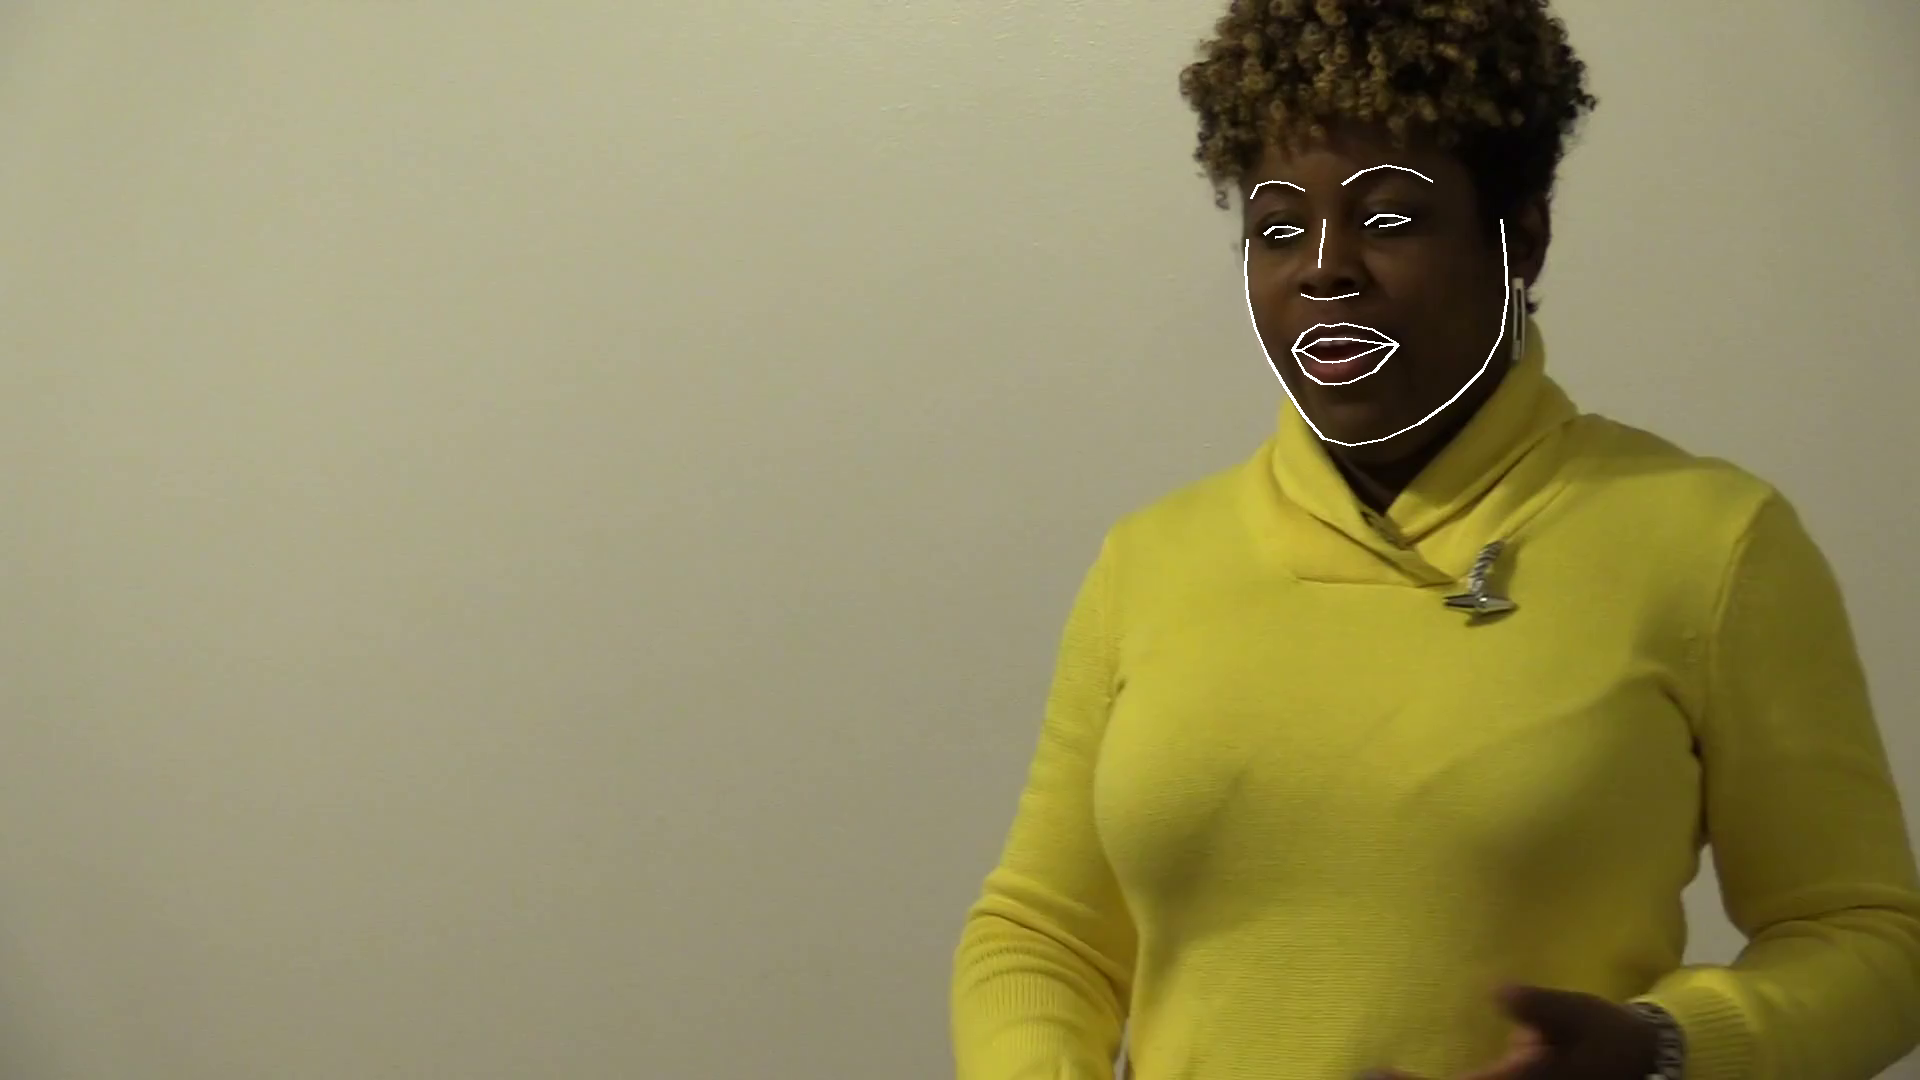

In [7]:
face_landmarks_list = face_recognition.face_landmarks(image)
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)
for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=3)

# Show the picture
display(pil_image)

### Displaying many test examples and labels

[[[197 212 201]
  [197 212 201]
  [197 212 201]
  ...
  [184 212 203]
  [184 212 203]
  [184 212 203]]

 [[197 212 201]
  [197 212 201]
  [197 212 201]
  ...
  [184 212 203]
  [184 212 203]
  [184 212 203]]

 [[197 212 201]
  [197 212 201]
  [197 212 201]
  ...
  [184 212 203]
  [184 212 203]
  [184 212 203]]

 ...

 [[211 214 191]
  [211 214 191]
  [211 214 191]
  ...
  [237 229 210]
  [238 229 208]
  [238 229 208]]

 [[211 214 191]
  [211 214 191]
  [211 214 191]
  ...
  [237 229 210]
  [238 229 208]
  [238 229 208]]

 [[211 214 191]
  [211 214 191]
  [211 214 191]
  ...
  [237 229 210]
  [238 229 208]
  [238 229 208]]]
[[[ 14  18  20]
  [ 14  18  20]
  [ 14  18  20]
  ...
  [101 126 127]
  [101 126 127]
  [101 126 127]]

 [[ 14  18  20]
  [ 14  18  20]
  [ 14  18  20]
  ...
  [101 126 127]
  [101 126 127]
  [101 126 127]]

 [[ 14  18  20]
  [ 14  18  20]
  [ 14  18  20]
  ...
  [101 126 127]
  [101 126 127]
  [101 126 127]]

 ...

 [[ 10  18  22]
  [  9  17  21]
  [  9  17  21]
  ..

[[[128 148 163]
  [128 148 163]
  [128 148 163]
  ...
  [125 139 158]
  [125 139 158]
  [125 139 158]]

 [[128 148 163]
  [128 148 163]
  [128 148 163]
  ...
  [125 139 158]
  [125 139 158]
  [125 139 158]]

 [[128 148 163]
  [128 148 163]
  [128 148 163]
  ...
  [125 139 158]
  [125 139 158]
  [125 139 158]]

 ...

 [[ 41  48  54]
  [ 41  48  54]
  [ 41  48  54]
  ...
  [246 254 253]
  [246 254 253]
  [246 254 253]]

 [[ 41  48  54]
  [ 41  48  54]
  [ 41  48  54]
  ...
  [246 254 253]
  [246 254 253]
  [246 254 253]]

 [[ 42  49  55]
  [ 42  49  55]
  [ 42  49  55]
  ...
  [246 254 253]
  [246 254 253]
  [246 254 253]]]
[[[203 223 252]
  [203 223 252]
  [204 224 253]
  ...
  [148 158 113]
  [148 158 113]
  [148 158 113]]

 [[203 223 252]
  [203 223 252]
  [204 224 253]
  ...
  [148 158 113]
  [148 158 113]
  [148 158 113]]

 [[203 223 252]
  [203 223 252]
  [204 224 253]
  ...
  [148 158 113]
  [148 158 113]
  [148 158 113]]

 ...

 [[240 249 255]
  [240 249 255]
  [240 249 255]
  ..

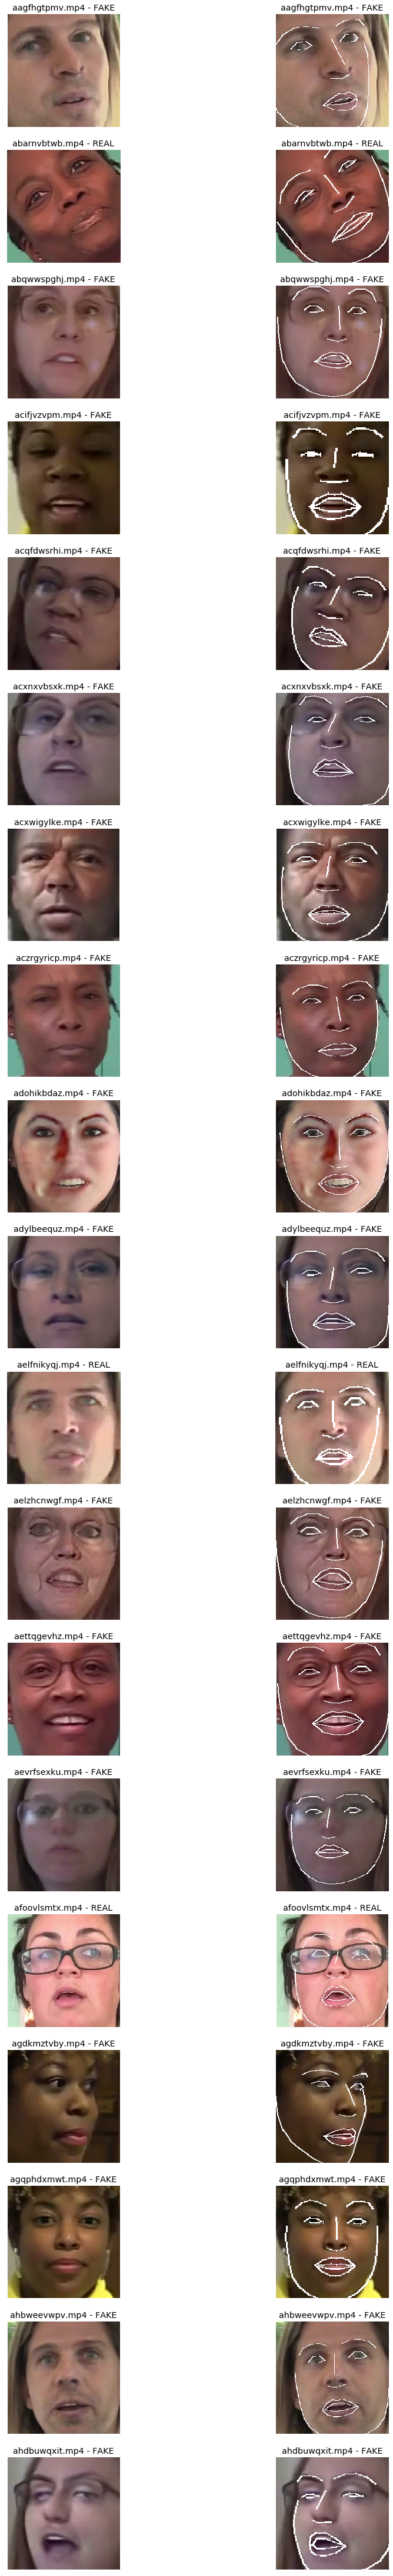

In [10]:
fig, axs = plt.subplots(19, 2, figsize=(15, 80))
axs = np.array(axs)
axs = axs.reshape(-1)
i = 0
for fn in train_sample_metadata.index[:23]:
    label = train_sample_metadata.loc[fn]['label']
    orig = train_sample_metadata.loc[fn]['label']
    video_file = f'/a/bear.cs.fiu.edu./disk/bear-b/users/hluo003/Downloads/data/train_sample_videos/{fn}'
    ax = axs[i]
    cap = cv.VideoCapture(video_file)
    success, image = cap.read()
    print(image)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) > 0:
        # Print first face
        face_location = face_locations[0]
        top, right, bottom, left = face_location
        face_image = image[top:bottom, left:right]
        ax.imshow(face_image)
        ax.grid(False)
        ax.title.set_text(f'{fn} - {label}')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        # Find landmarks
        face_landmarks_list = face_recognition.face_landmarks(face_image)
        face_landmarks = face_landmarks_list[0]
        pil_image = Image.fromarray(face_image)
        d = ImageDraw.Draw(pil_image)
        for facial_feature in face_landmarks.keys():
            d.line(face_landmarks[facial_feature], width=2)
        landmark_face_array = np.array(pil_image)
        ax2 = axs[i+1]
        ax2.imshow(landmark_face_array)
        ax2.grid(False)
        ax2.title.set_text(f'{fn} - {label}')
        ax2.xaxis.set_visible(False)
        ax2.yaxis.set_visible(False)
        i += 2
plt.grid(False)
plt.show()

### Add padding to zoom out of face

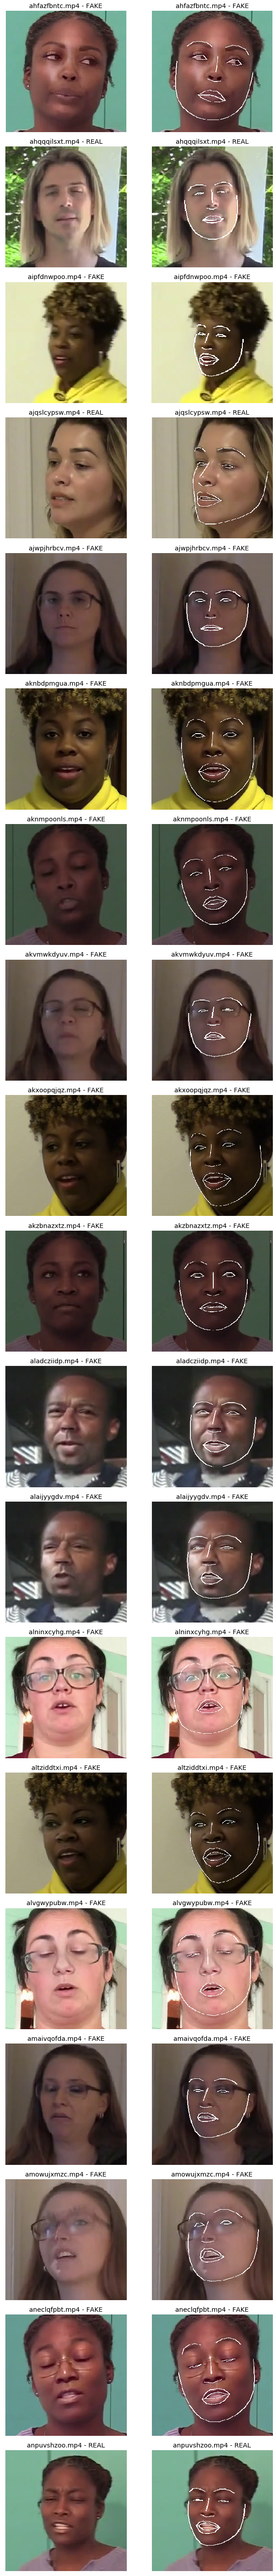

In [11]:
fig, axs = plt.subplots(19, 2, figsize=(10, 80))
axs = np.array(axs)
axs = axs.reshape(-1)
i = 0
pad = 60
for fn in train_sample_metadata.index[23:44]:
    label = train_sample_metadata.loc[fn]['label']
    orig = train_sample_metadata.loc[fn]['label']
    video_file = f'/a/bear.cs.fiu.edu./disk/bear-b/users/hluo003/Downloads/data/train_sample_videos/{fn}'
    ax = axs[i]
    cap = cv.VideoCapture(video_file)
    success, image = cap.read()
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) > 0:
        # Print first face
        face_location = face_locations[0]
        top, right, bottom, left = face_location
        face_image = image[top-pad:bottom+pad, left-pad:right+pad]
        ax.imshow(face_image)
        ax.grid(False)
        ax.title.set_text(f'{fn} - {label}')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        # Find landmarks
        face_landmarks_list = face_recognition.face_landmarks(face_image)
        try:
            face_landmarks = face_landmarks_list[0]
            pil_image = Image.fromarray(face_image)
            d = ImageDraw.Draw(pil_image)
            for facial_feature in face_landmarks.keys():
                d.line(face_landmarks[facial_feature], width=2, fill='white')
            landmark_face_array = np.array(pil_image)
            ax2 = axs[i+1]
            ax2.imshow(landmark_face_array)
            ax2.grid(False)
            ax2.title.set_text(f'{fn} - {label}')
            ax2.xaxis.set_visible(False)
            ax2.yaxis.set_visible(False)
            i += 2
        except:
            pass
plt.grid(False)
plt.tight_layout()
plt.show()

### Frame by Frame Face Detection

In [ ]:
# take akxoopqjqz.mp4 as an example

In [15]:
video_file = '/a/bear.cs.fiu.edu./disk/bear-b/users/hluo003/Downloads/data/train_sample_videos/akxoopqjqz.mp4'

cap = cv.VideoCapture(video_file)

frames = []
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frames.append(frame)
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()

print('The number of frames saved: ', len(frames))

The number of frames saved:  300


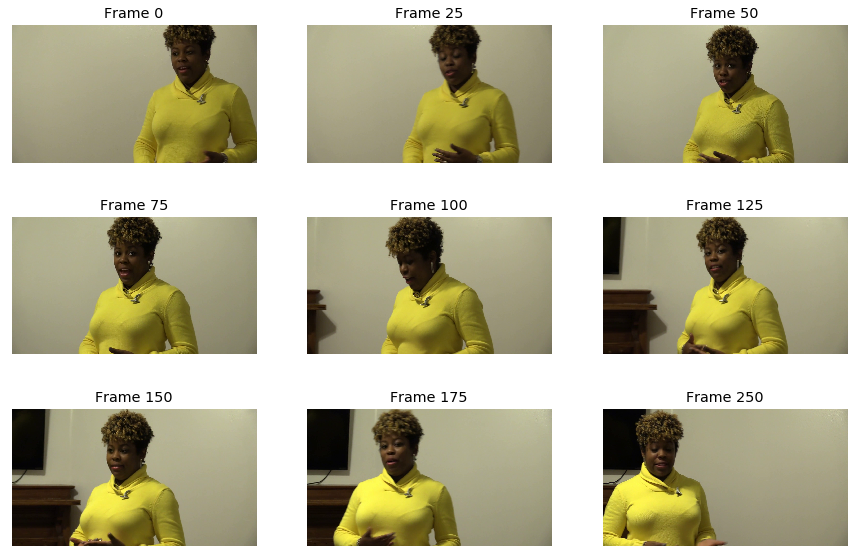

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = np.array(axes)
axes = axes.reshape(-1)

ax_ix = 0
for i in [0, 25, 50, 75, 100, 125, 150, 175, 250]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    image = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    axes[ax_ix].set_title(f'Frame {i}')
    ax_ix += 1
plt.grid(False)
plt.show()

Could not find face in frame 100


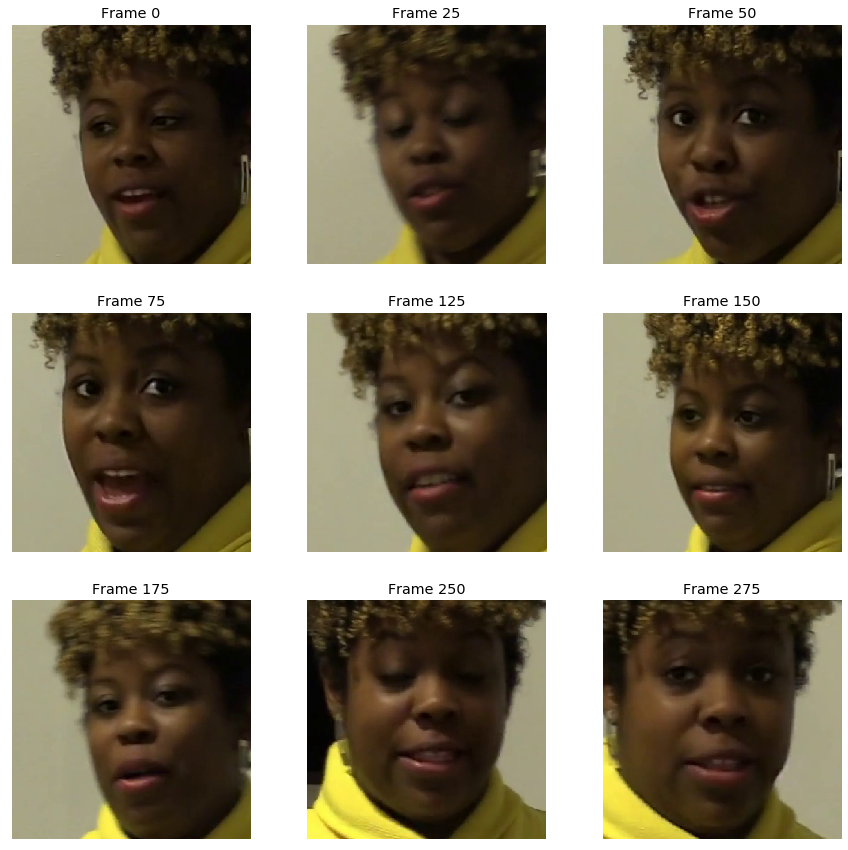

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = np.array(axes)
axes = axes.reshape(-1)
ax_ix = 0
padding = 40
for i in [0, 25, 50, 75, 100, 125, 150, 175, 250, 275]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    face_locations = face_recognition.face_locations(frame)
    if len(face_locations) == 0:
        print(f'Could not find face in frame {i}')
        continue
    top, right, bottom, left = face_locations[0]
    frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
    image = cv.cvtColor(frame_face, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    axes[ax_ix].set_title(f'Frame {i}')
    ax_ix += 1
plt.grid(False)
plt.show()

### Plotting facial landmarks for each frame

Count find face in frame 100


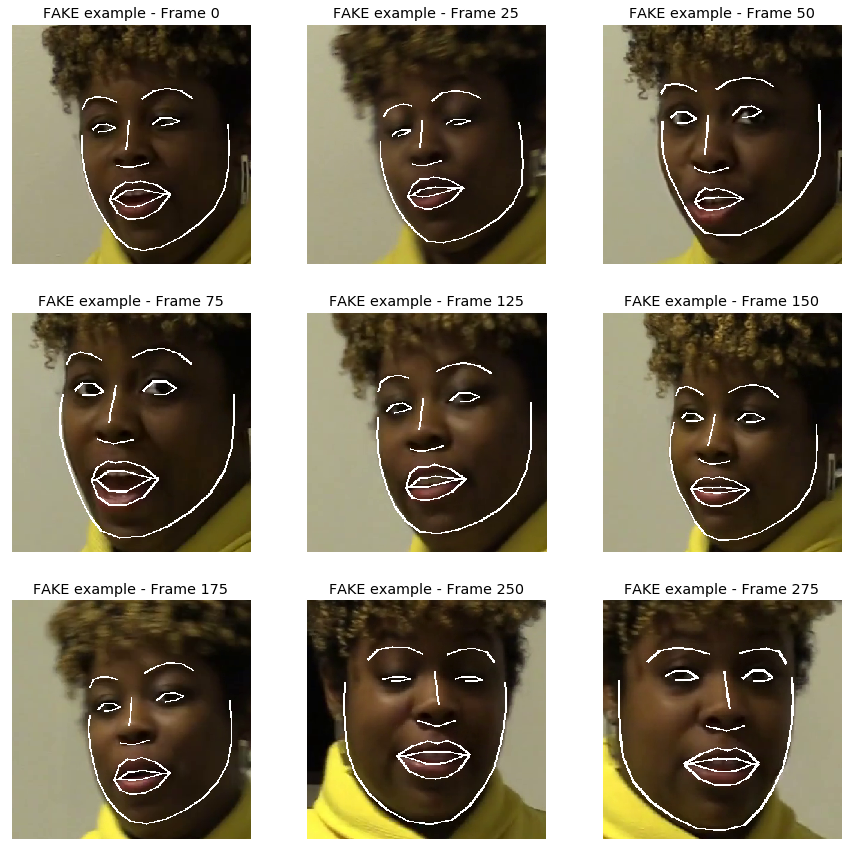

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = np.array(axes)
axes = axes.reshape(-1)
ax_ix = 0
padding = 40
for i in [0, 25, 50, 75, 100, 125, 150, 175, 250, 275]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    face_locations = face_recognition.face_locations(frame)
    if len(face_locations) == 0:
        print(f'Count find face in frame {i}')
        continue
    top, right, bottom, left = face_locations[0]
    frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
    face_landmarks_list = face_recognition.face_landmarks(frame_face)
    if len(face_landmarks_list) == 0:
        print(f'Could not identify face landmarks for frame {i}')
        continue
    face_landmarks = face_landmarks_list[0]
    pil_image = Image.fromarray(frame_face)
    d = ImageDraw.Draw(pil_image)
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=3, fill='white')
    landmark_face_array = np.array(pil_image)
    image = cv.cvtColor(landmark_face_array, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].grid(False)
    axes[ax_ix].set_title(f'FAKE example - Frame {i}')
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    ax_ix += 1
plt.grid(False)
plt.show()

### Frame by frame of REAL example

The number of frames saved:  300


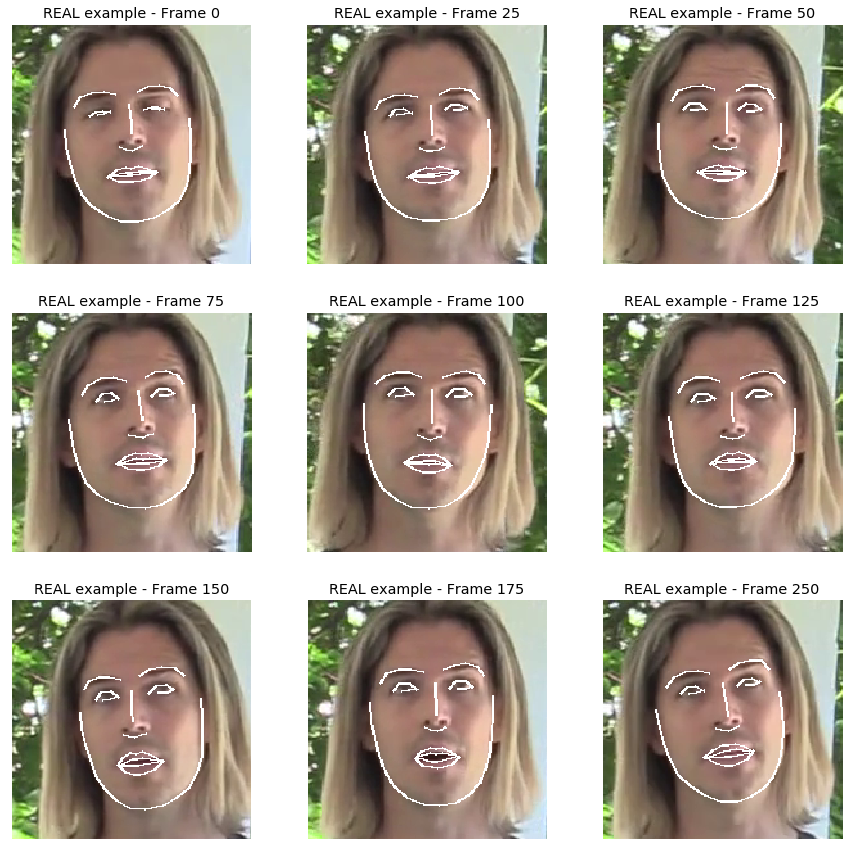

In [20]:
fn = 'ahqqqilsxt.mp4'
video_file = f'/a/bear.cs.fiu.edu./disk/bear-b/users/hluo003/Downloads/data/train_sample_videos/{fn}'

cap = cv.VideoCapture(video_file)

frames = []
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frames.append(frame)
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()

print('The number of frames saved: ', len(frames))

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = np.array(axes)
axes = axes.reshape(-1)
ax_ix = 0
padding = 40
for i in [0, 25, 50, 75, 100, 125, 150, 175, 250, 275]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    face_locations = face_recognition.face_locations(frame)
    if len(face_locations) == 0:
        print(f'Count find face in frame {i}')
        continue
    top, right, bottom, left = face_locations[0]
    frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
    face_landmarks_list = face_recognition.face_landmarks(frame_face)
    if len(face_landmarks_list) == 0:
        print(f'Could not identify face landmarks for frame {i}')
        continue
    face_landmarks = face_landmarks_list[0]
    pil_image = Image.fromarray(frame_face)
    d = ImageDraw.Draw(pil_image)
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=2, fill='white')
    landmark_face_array = np.array(pil_image)
    image = cv.cvtColor(landmark_face_array, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].grid(False)
    axes[ax_ix].set_title(f'REAL example - Frame {i}')
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    ax_ix += 1
    if ax_ix >= len(axes):
        break
plt.grid(False)
plt.show()